# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


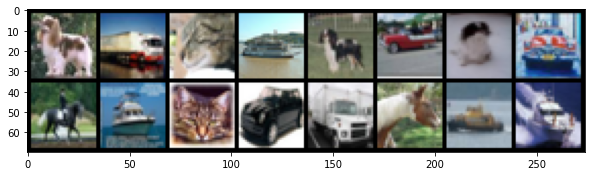

In [3]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

In [4]:
class Fully_connected_Autoencoder(nn.Module):
    def __init__(self):
        super(Fully_connected_Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Linear(32*32*3,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,16),
            nn.ReLU(),
            nn.Linear(16,8)
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            
            nn.Linear(128, 32*32*3),
            nn.Sigmoid()
            
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [5]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model(AutoencoderClass):
  autoencoder = AutoencoderClass()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [6]:
autoencoder = create_model(Fully_connected_Autoencoder)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Linear(in_features=3072, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=8, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=3072, bias=True)
  (7): Sigmoid()
)



### Training

In [7]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
			inputs = inputs.reshape(-1,32*32*3)
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.035
[2,  2000] loss: 0.029
[3,  2000] loss: 0.025
[4,  2000] loss: 0.025
[5,  2000] loss: 0.025
[6,  2000] loss: 0.024
[7,  2000] loss: 0.024
[8,  2000] loss: 0.024
[9,  2000] loss: 0.024
[10,  2000] loss: 0.024
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


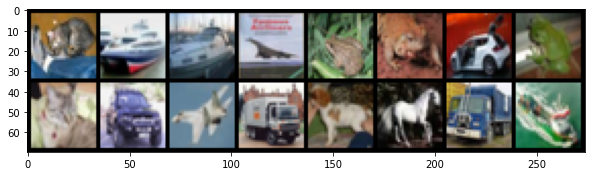

Reconstructed image


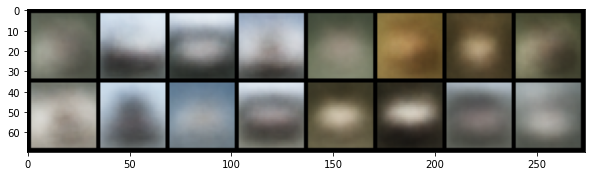

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)
images = images.reshape(16,32*32*3)
print("Reconstructed image")
decoded_imgs = autoencoder.forward(images)[1]
t2 = torch.reshape(decoded_imgs,(16,3,32,32))
imshow(torchvision.utils.make_grid(t2.data))

# Convolutional Auto Encoder

In [ ]:
class Conv_Autoencoder(nn.Module):
    def __init__(self):
        super(Conv_Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here

            # nn.Conv2d(3, 12, 4, stride=2, padding=1),
            # nn.ReLU(),
            
            nn.Conv2d(3, 12, 4,stride=2, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(2, 2),

            nn.Conv2d(12, 24, 4, stride=2,padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(2, 2),

            nn.Conv2d(24, 36, 4, stride=2,padding=1),
            nn.ReLU()
            # nn.MaxPool2d(2, 2)

        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            # nn.Sigmoid(),
            nn.ConvTranspose2d(36, 24, 4, stride=2, padding=1),
            # nn.ReLU(),

            nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),
            # nn.ReLU(),

            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid()

        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
convAutoencoder = create_model(Conv_Autoencoder)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()
optimizer = optim.Adam(convAutoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (2): Conv2d(24, 36, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(36, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (2): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): Sigmoid()
)



In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
			# inputs = inputs.reshape(-1,32*32*3)
			# ============ Forward ============
			encoded, outputs = convAutoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(convAutoencoder.state_dict(), "conv_autoencoder.pt")

[1,  2000] loss: 0.009
[2,  2000] loss: 0.003
[3,  2000] loss: 0.002
[4,  2000] loss: 0.002
[5,  2000] loss: 0.002
[6,  2000] loss: 0.002
[7,  2000] loss: 0.002
[8,  2000] loss: 0.002
[9,  2000] loss: 0.002
[10,  2000] loss: 0.002
Finished Training
Saving Model...


In [ ]:
convAutoencoder.load_state_dict(torch.load("/content/conv_autoencoder.pt"))

<All keys matched successfully>

For MSE Loss

GroundTruth:    cat  ship  ship plane  frog


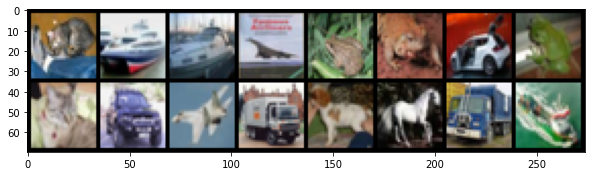

Reconstructed image


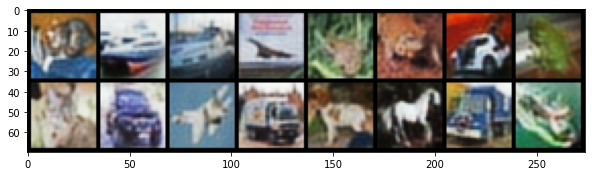

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

# images = Variable(images)
# images = images.reshape(16,32*32*3)
print("Reconstructed image")
decoded_imgs = convAutoencoder(images)[1]
# t2 = torch.reshape(decoded_imgs,(16,3,32,32))
imshow(torchvision.utils.make_grid(decoded_imgs))

In [ ]:
class conv_and_fully_connec_Autoencoder(nn.Module):
    def __init__(self):
        super(conv_and_fully_connec_Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4,stride=2, padding=1),
            

            nn.Conv2d(12, 24, 4, stride=2,padding=1),
            

            # nn.Conv2d(24, 36, 4, stride=2,padding=1),
            
            nn.Flatten(start_dim=1),
            nn.Linear(1536,600),
            # nn.ReLU(),
            # nn.Linear(64,10)
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.Linear(10,64),
            # nn.ReLU(),
            nn.Linear(600,1536),
            nn.ReLU(),
            
            nn.Unflatten(dim=1,unflattened_size=(24,8,8)),
            # nn.ConvTranspose2d(36, 24, 4, stride=2, padding=1),
            nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
            
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
conv_fullyConnec_Autoencoder = create_model(conv_and_fully_connec_Autoencoder)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()
optimizer = optim.Adam(conv_fullyConnec_Autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (2): Flatten(start_dim=1, end_dim=-1)
  (3): Linear(in_features=1536, out_features=600, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=600, out_features=1536, bias=True)
  (1): ReLU()
  (2): Unflatten(dim=1, unflattened_size=(24, 8, 8))
  (3): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (4): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): Sigmoid()
)



In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
			# inputs = inputs.reshape(-1,32*32*3)
			# ============ Forward ============
			encoded, outputs = conv_fullyConnec_Autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(conv_fullyConnec_Autoencoder.state_dict(), "conv_fully_connec_autoencoder.pt")

[1,  2000] loss: 0.010
[2,  2000] loss: 0.003
[3,  2000] loss: 0.002
[4,  2000] loss: 0.002
[5,  2000] loss: 0.002
[6,  2000] loss: 0.002
[7,  2000] loss: 0.002
[8,  2000] loss: 0.001
[9,  2000] loss: 0.001
[10,  2000] loss: 0.001
Finished Training
Saving Model...


In [ ]:
conv_fullyConnec_Autoencoder.load_state_dict(torch.load("/content/conv_fully_connec_autoencoder.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


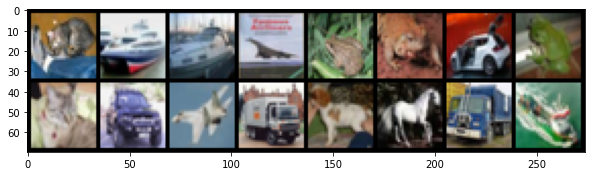

Reconstructed image


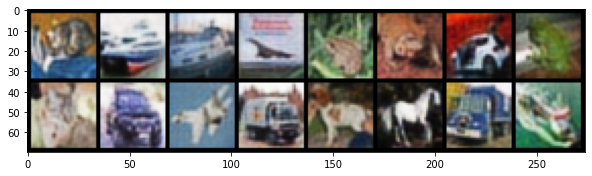

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

# images = Variable(images)
# images = images.reshape(16,32*32*3)
print("Reconstructed image")
decoded_imgs = conv_fullyConnec_Autoencoder(images)[1]
# t2 = torch.reshape(decoded_imgs,(16,3,32,32))
imshow(torchvision.utils.make_grid(decoded_imgs))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

### Applications
- Image Compression
- Image Denoising
- Feature Extraction
- Dimensionality Reduction
- Recommendation systems

### Types of Autoencoders
- Denoising autoencoder

  They create a corrupted copy of the input by introducing some noise.
  Using this, copying the input to the output without learning features about the data can be avoided.

- Sparse Autoencoder

They have hidden nodes greater than input nodes. Sparsity constraint is introduced on the hidden layer. This is to prevent output layer copy input data.

- Deep Autoencoder

It consists of two identical deep belief networks,One network for encoding and another for decoding.

- Contractive Autoencoder

 It has a robust learned representation which is less sensitive to small variation in the data.Robustness of the representation for the data is done by applying a penalty term to the loss function.

- Undercomplete Autoencoder

It captures the most important features present in the data. Undercomplete autoencoders have a smaller dimension for hidden layer compared to the input layer.

- Convolutional Autoencoder

They learn to encode the input in a set of simple signals and then try to reconstruct the input from them, modify the geometry or the reflectance of the image.

- Variational Autoencoder

 It uses a variational approach for latent representation learning, which results in an additional loss component and a specific estimator for the training algorithm called the Stochastic Gradient Variational Bayes estimator.

####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).
- PCA is linear transformarion. Auto encoders are comprised of non linear process.
- PCA features are projections onto the orthogonal basis,autoencoded features are only trained for correct reconstruction, they may have correlations.
- PCA is faster and computationally cheaper
- A single layered autoencoder with a linear activation function is very similar to PCA.